In [233]:
# Veri işleme ve analizi için
import pandas as pd
import numpy as np

In [234]:
# Veri görselleştirme için
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# Makine öğrenmesi için
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [236]:
# Model değerlendirme için
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [237]:
#Datasetin yüklenmesi
data = pd.read_csv ('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [238]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [239]:
data.shape

(7043, 21)

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [241]:
# 'CustomerID' sütununu datasetten çıkarma
data = data.drop(['customerID'], axis=1)
print(data.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [242]:
# Sayısal ve kategorik sütunları belirleme
column_numerical = ['tenure', 'monthly_charges', 'total_charges']
column_categorical = [col for col in data.columns if col not in column_numerical]

# Sütun türlerini belirleme
data_column_types = {col: 'numerical' if col in column_numerical else 'categorical' for col in data.columns}

# DataFrame oluşturma
data_column_types_df = pd.DataFrame([data_column_types], index=['data types'])

# Sonucu görüntüleme
data_column_types_df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical


In [243]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


In [244]:
data.loc[data['tenure'] == 0, ['tenure', 'TotalCharges', 'Churn']]

,tenure,TotalCharges,Churn
488,0,,No
753,0,,No
936,0,,No
1082,0,,No
1340,0,,No
3331,0,,No
3826,0,,No
4380,0,,No
5218,0,,No
6670,0,,No


In [245]:
# TotalCharges sütunundaki boşluk karakterlerini NaN ile değiştirme
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

# Eksik değerleri 0 ile doldurma
data['TotalCharges'] = data['TotalCharges'].fillna(0)

# TotalCharges sütununu sayısal değere dönüştürme
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [246]:
data.loc[data['tenure'] == 0, ['tenure', 'TotalCharges', 'Churn']]

,tenure,TotalCharges,Churn
488,0,0.0,No
753,0,0.0,No
936,0,0.0,No
1082,0,0.0,No
1340,0,0.0,No
3331,0,0.0,No
3826,0,0.0,No
4380,0,0.0,No
5218,0,0.0,No
6670,0,0.0,No


In [247]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [248]:
data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})
data_count

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043


In [249]:
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})
data_null_total

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [250]:
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automa...","18.25, 18.4, 18.55, 18.7, 18.75, 18.8, 18.85, ...","0.0, 18.8, 18.85, 18.9, 19.0, 19.05, 19.1, 19....","No, Yes"


In [251]:
# "No internet service" ve "No phone service" değerlerini "No" olarak değiştirme
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

# Kategorik sütunları belirleme
column_categorical = data.select_dtypes(include='object').columns.tolist()

# Kategorik sütunların benzersiz değerlerini toplama ve sıralama
variation_categorical = {}

for col in column_categorical:
    unique_values = sorted(data[col].unique().tolist())
    variation_categorical[col] = ', '.join(unique_values)

# Sözlüğü Pandas Serisi'ne dönüştürme
data_variation_categorical = pd.Series(variation_categorical, name='data variation').to_frame().T

# Sonucu görüntüleme
print(data_variation_categorical)

                      gender  Partner Dependents PhoneService MultipleLines  \
data variation  Female, Male  No, Yes    No, Yes      No, Yes       No, Yes   

                     InternetService OnlineSecurity OnlineBackup  \
data variation  DSL, Fiber optic, No        No, Yes      No, Yes   

               DeviceProtection TechSupport StreamingTV StreamingMovies  \
data variation          No, Yes     No, Yes     No, Yes         No, Yes   

                                          Contract PaperlessBilling  \
data variation  Month-to-month, One year, Two year          No, Yes   

                                                    PaymentMethod    Churn  
data variation  Bank transfer (automatic), Credit card (automa...  No, Yes  


In [252]:
# Sayısal sütunları belirleme
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Tüm sütunları al
categorical_columns = list(data.columns)

# Sayısal sütunları ve hedef sütunu çıkar
for col in numerical_columns + ['Churn']:
    if col in categorical_columns:
        categorical_columns.remove(col)

print("Sayısal sütunlar:", numerical_columns)
print("Kategorik sütunlar:", categorical_columns)


Sayısal sütunlar: ['tenure', 'MonthlyCharges', 'TotalCharges']
Kategorik sütunlar: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [253]:
# Veri setini kopyalama
data_viz = data.copy()

# churn sütununu dönüştürme
data_viz['Churn'] = data_viz['Churn'].map({'Yes': 'churn', 'No': 'retain'})

# Sonucu görüntüleme
print(data_viz)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1              

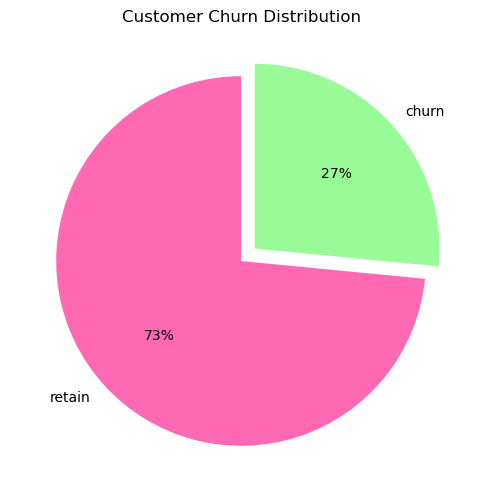

In [254]:
# churn sütununu dönüştürme
data['Churn'] = data['Churn'].map({'Yes': 'churn', 'No': 'retain'})

# Yüzde değerlerini hesapla
pie_data = data['Churn'].value_counts(normalize=True) * 100
pie_labels = data['Churn'].value_counts(normalize=True).index

# Renk paletini belirleme
colors = ['#ff69b4', '#98fb98']   # Pembe ve Yeşil

# Pasta grafiği oluştur
plt.figure(figsize=(8, 6))
plt.pie(pie_data, labels=pie_labels, autopct='%.0f%%', startangle=90, explode=[0, 0.1], colors=colors)

# Başlık ekle ve grafiği göster
plt.title('Customer Churn Distribution')
plt.show()

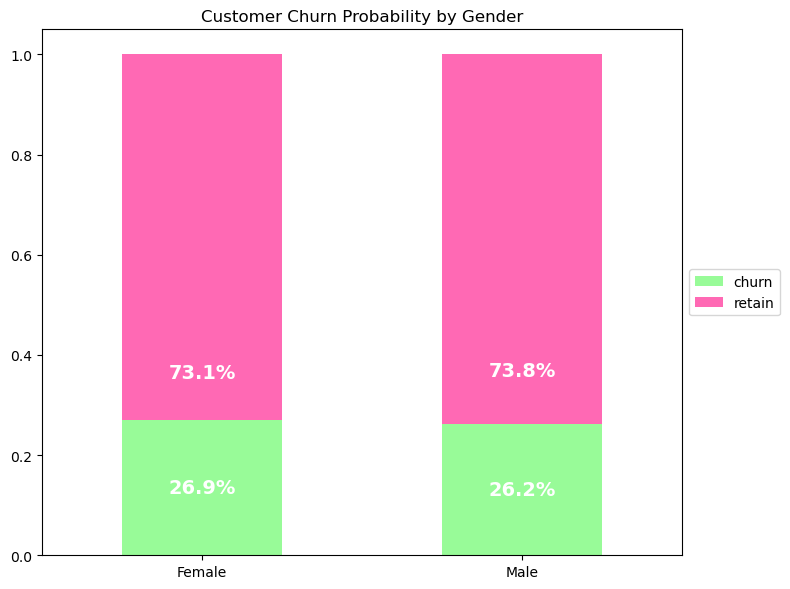

In [255]:
# Cinsiyet bazında churn oranlarını hesaplayın
gender_churn = pd.crosstab(data['gender'], data['Churn'], normalize='index')

# Grafiği oluşturun
ax = gender_churn.plot(kind='bar', stacked=True, color=['#98fb98', '#ff69b4'], figsize=(8, 6))

# Yüzde değerlerini ekleyin
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                ha='center', va='center', color='white', fontsize=14, fontweight='bold')

# Başlık ve etiketler
plt.title('Customer Churn Probability by Gender')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='')
plt.tight_layout()

plt.show()

In [256]:
# Kategorik sütunları belirleme
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'Churn']


# SeniorCitizen sütununu kategorik olarak ele almak
if 'SeniorCitizen' in data.columns:
    data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)
    categorical_columns = categorical_columns.append(pd.Index(['SeniorCitizen']))


# Çapraz tablo oluşturma ve birleştirme
attr_crosstab = pd.DataFrame()

for col in categorical_columns:
    ct = pd.crosstab(index=data[col], columns=data['Churn'], normalize='index').reset_index()
    ct['attribute'] = ct[col].apply(lambda x: f'{col} ({x})')
    ct = ct.drop(columns=[col])
    attr_crosstab = pd.concat([attr_crosstab, ct])

# Çapraz tabloyu sıralama
attr_crosstab = attr_crosstab.sort_values('churn', ascending=False).reset_index(drop=True)

# Çıktıyı görüntüleme
attr_crosstab.style.background_gradient()

Churn,churn,retain,attribute
0,0.452854,0.547146,PaymentMethod (Electronic check)
1,0.427097,0.572903,Contract (Month-to-month)
2,0.418928,0.581072,InternetService (Fiber optic)
3,0.416813,0.583187,SeniorCitizen (1)
4,0.335651,0.664349,PaperlessBilling (Yes)
5,0.329580,0.670420,Partner (No)
6,0.313296,0.686704,OnlineSecurity (No)
7,0.312791,0.687209,Dependents (No)
8,0.311862,0.688138,TechSupport (No)
9,0.300702,0.699298,StreamingTV (Yes)


C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na optio

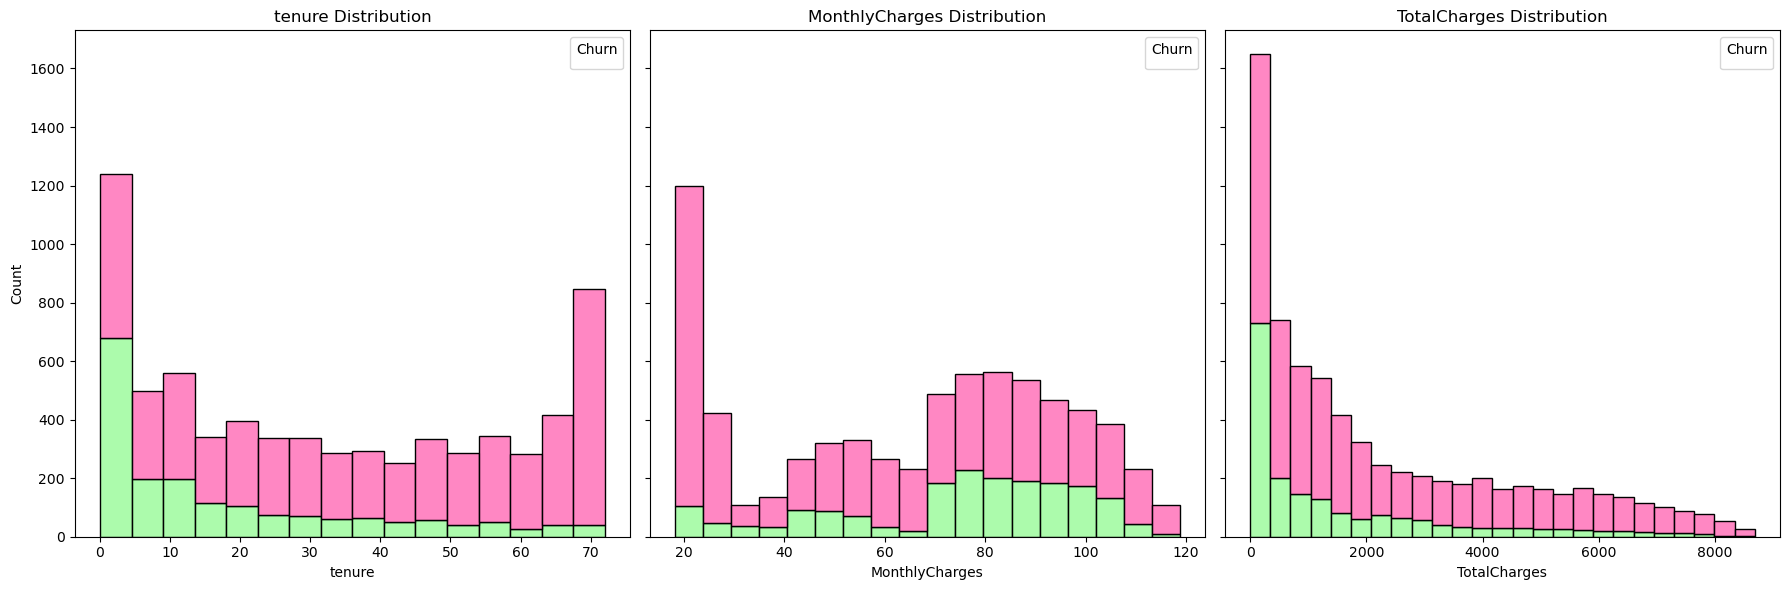

In [257]:
# Sayısal sütunlar
column_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Renk paleti
colors = ['#ff69b4', '#98fb98']  # Pembe ve Yeşil

# Grafikleri oluştur
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Her sütun için döngü
for ax, col in zip(axes, column_numerical):
    sns.histplot(data=data, x=col, hue='Churn', multiple='stack', palette=colors, ax=ax, alpha=0.8)
    ax.legend(title='Churn', loc='upper right')
    ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [258]:
# Bağımsız değişkenlerin ve bağımlı değişkenin belirlenmesi
X = data.drop(columns='Churn')
y = data['Churn']

# Eğitim ve test setlerine bölelim (70% eğitim, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import LabelEncoder

# LabelEncoder'ı tanımla
le = LabelEncoder()

# Eğitim setini sayısal değerlere dönüştür ve fit et
y_train_encode = le.fit_transform(y_train)

# Test setini sayısal değerlere dönüştür
y_test_encode = le.transform(y_test)

# Dönüştürülen churn sütunundaki benzersiz değerleri kontrol edelim
print("y_train_encode benzersiz değerler:", pd.Series(y_train_encode).unique())
print("y_test_encode benzersiz değerler:", pd.Series(y_test_encode).unique())
print("LabelEncoder sınıfları:", le.classes_)

y_train_encode benzersiz değerler: [1 0]
y_test_encode benzersiz değerler: [0 1]
LabelEncoder sınıfları: ['churn' 'retain']


In [259]:
# Kategorik sütunları belirleyelim
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# OneHotEncoder'ı tanımla
ohe = OneHotEncoder(sparse=False, drop='if_binary')

# Eğitim verisini dönüştür ve DataFrame'e çevir
X_train_encoded = ohe.fit_transform(X_train[categorical_columns])
X_train_encoded = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(categorical_columns))

# Test verisini dönüştür ve DataFrame'e çevir
X_test_encoded = ohe.transform(X_test[categorical_columns])
X_test_encoded = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(categorical_columns))

# Sayısal sütunları al ve birleştir
X_train_encoded = X_train.drop(columns=categorical_columns).reset_index(drop=True).join(X_train_encoded)
X_test_encoded = X_test.drop(columns=categorical_columns).reset_index(drop=True).join(X_test_encoded)

C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [260]:
# MinMaxScaler ile sayısal veriyi ölçeklendir
scaler = MinMaxScaler()
column_numerical = X_train_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

X_train_encoded[column_numerical] = scaler.fit_transform(X_train_encoded[column_numerical])
X_test_encoded[column_numerical] = scaler.transform(X_test_encoded[column_numerical])

# Dönüştürülen veri çerçevelerini oluştur
data_scale = pd.concat([X_train_encoded, X_test_encoded], axis=0)
data_scale.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.027778,0.768657,0.020916,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.347222,0.156716,0.098218,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.375000,0.508458,0.221916,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.041667,0.712438,0.028602,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.555556,0.652736,0.406716,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [261]:
# 'churn' sütununu ekleyin
churn_train = pd.Series(y_train_encode, index=X_train_encoded.index, name='churn')
churn_test = pd.Series(y_test_encode, index=X_test_encoded.index, name='churn')
churn_combined = pd.concat([churn_train, churn_test])
data_scale['churn'] = churn_combined

In [262]:
corr_matrix = data_encode.corr().round(3)
corr_positive = corr_matrix['churn'][corr_matrix['churn'] > 0].drop('churn').sort_values(ascending=False)

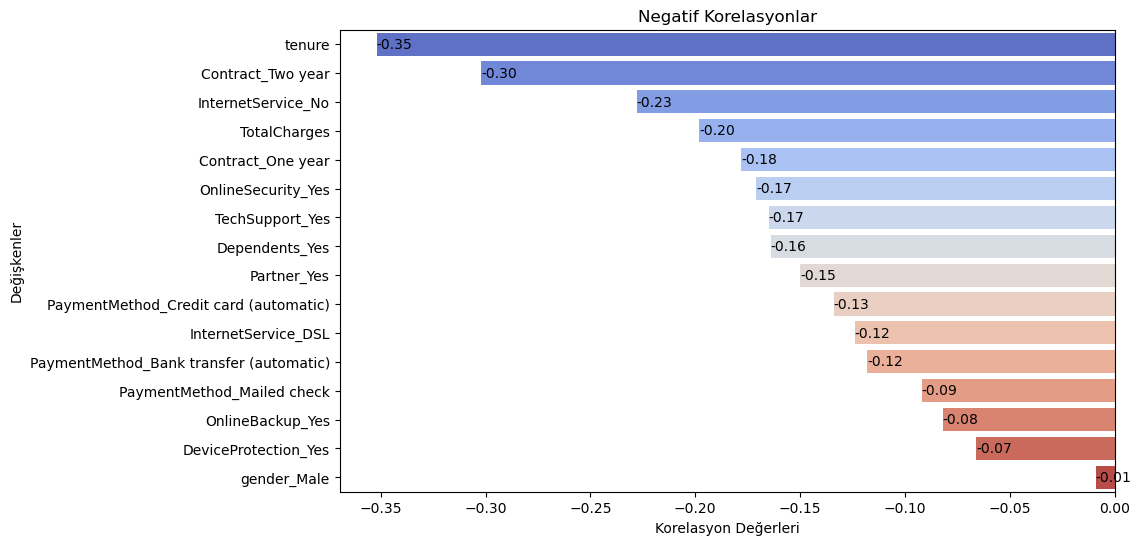

In [263]:
# Negatif korelasyonları görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_negative.values, y=corr_negative.index, palette='coolwarm')
plt.title('Negatif Korelasyonlar')
plt.xlabel('Korelasyon Değerleri')
plt.ylabel('Değişkenler')
for index, value in enumerate(corr_negative.values):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()

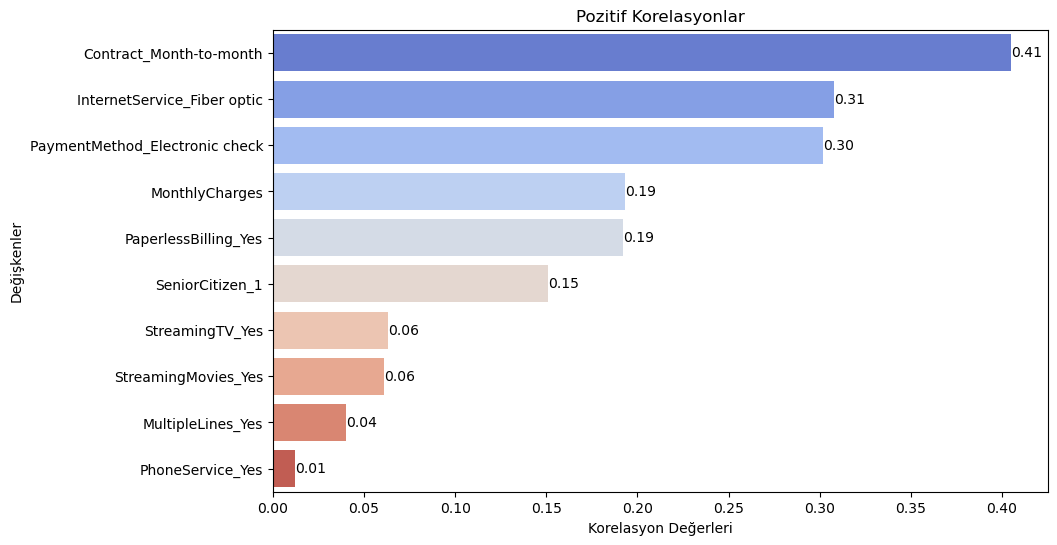

In [264]:
# Pozitif korelasyonları görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_positive.values, y=corr_positive.index, palette='coolwarm')

# Çubuk etiketlerini ekle
for index, value in enumerate(corr_positive.values):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Pozitif Korelasyonlar')
plt.xlabel('Korelasyon Değerleri')
plt.ylabel('Değişkenler')
plt.show()

In [265]:
# Eğitim ve test veri kümelerindeki 'churn' sütunlarını kontrol et
print("y_train benzersiz değerler:", y_train.unique())
print("y_test benzersiz değerler:", y_test.unique())

# Churn sütununu ekleyin
data_encode['churn'] = pd.concat([y_train, y_test], axis=0).values

# 'churn' sütununu sayısal değerlere dönüştürme
data_encode['churn'] = data_encode['churn'].apply(lambda x: 1 if x == 'churn' else 0)

print("Dönüştürülmüş churn sütunu:", data_encode['churn'].unique())

y_train benzersiz değerler: ['retain' 'churn']
y_test benzersiz değerler: ['churn' 'retain']
Dönüştürülmüş churn sütunu: [0 1]


In [269]:
from imblearn.over_sampling import SMOTE

# SMOTE ile oversampling yap
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train_encode)

# SMOTE uygulanmış veriyi birleştir
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_encoded.columns)
y_train_smote_df = pd.Series(y_train_smote, name='churn')

# Dengeli veri çerçevesini kontrol et
print("Dengesiz veri setindeki 'churn' dağılımı:\n", pd.Series(y_train_encode).value_counts())
print("Dengeli veri setindeki 'churn' dağılımı:\n", y_train_smote_df.value_counts())

# Sonucu görüntüle
data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)
data_smote.head()

Dengesiz veri setindeki 'churn' dağılımı:
 1    3622
0    1308
Name: count, dtype: int64
Dengeli veri setindeki 'churn' dağılımı:
 churn
1    3622
0    3622
Name: count, dtype: int64


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn
0,0.027778,0.768657,0.020916,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,0.347222,0.156716,0.098218,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,0.375000,0.508458,0.221916,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.041667,0.712438,0.028602,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.555556,0.652736,0.406716,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

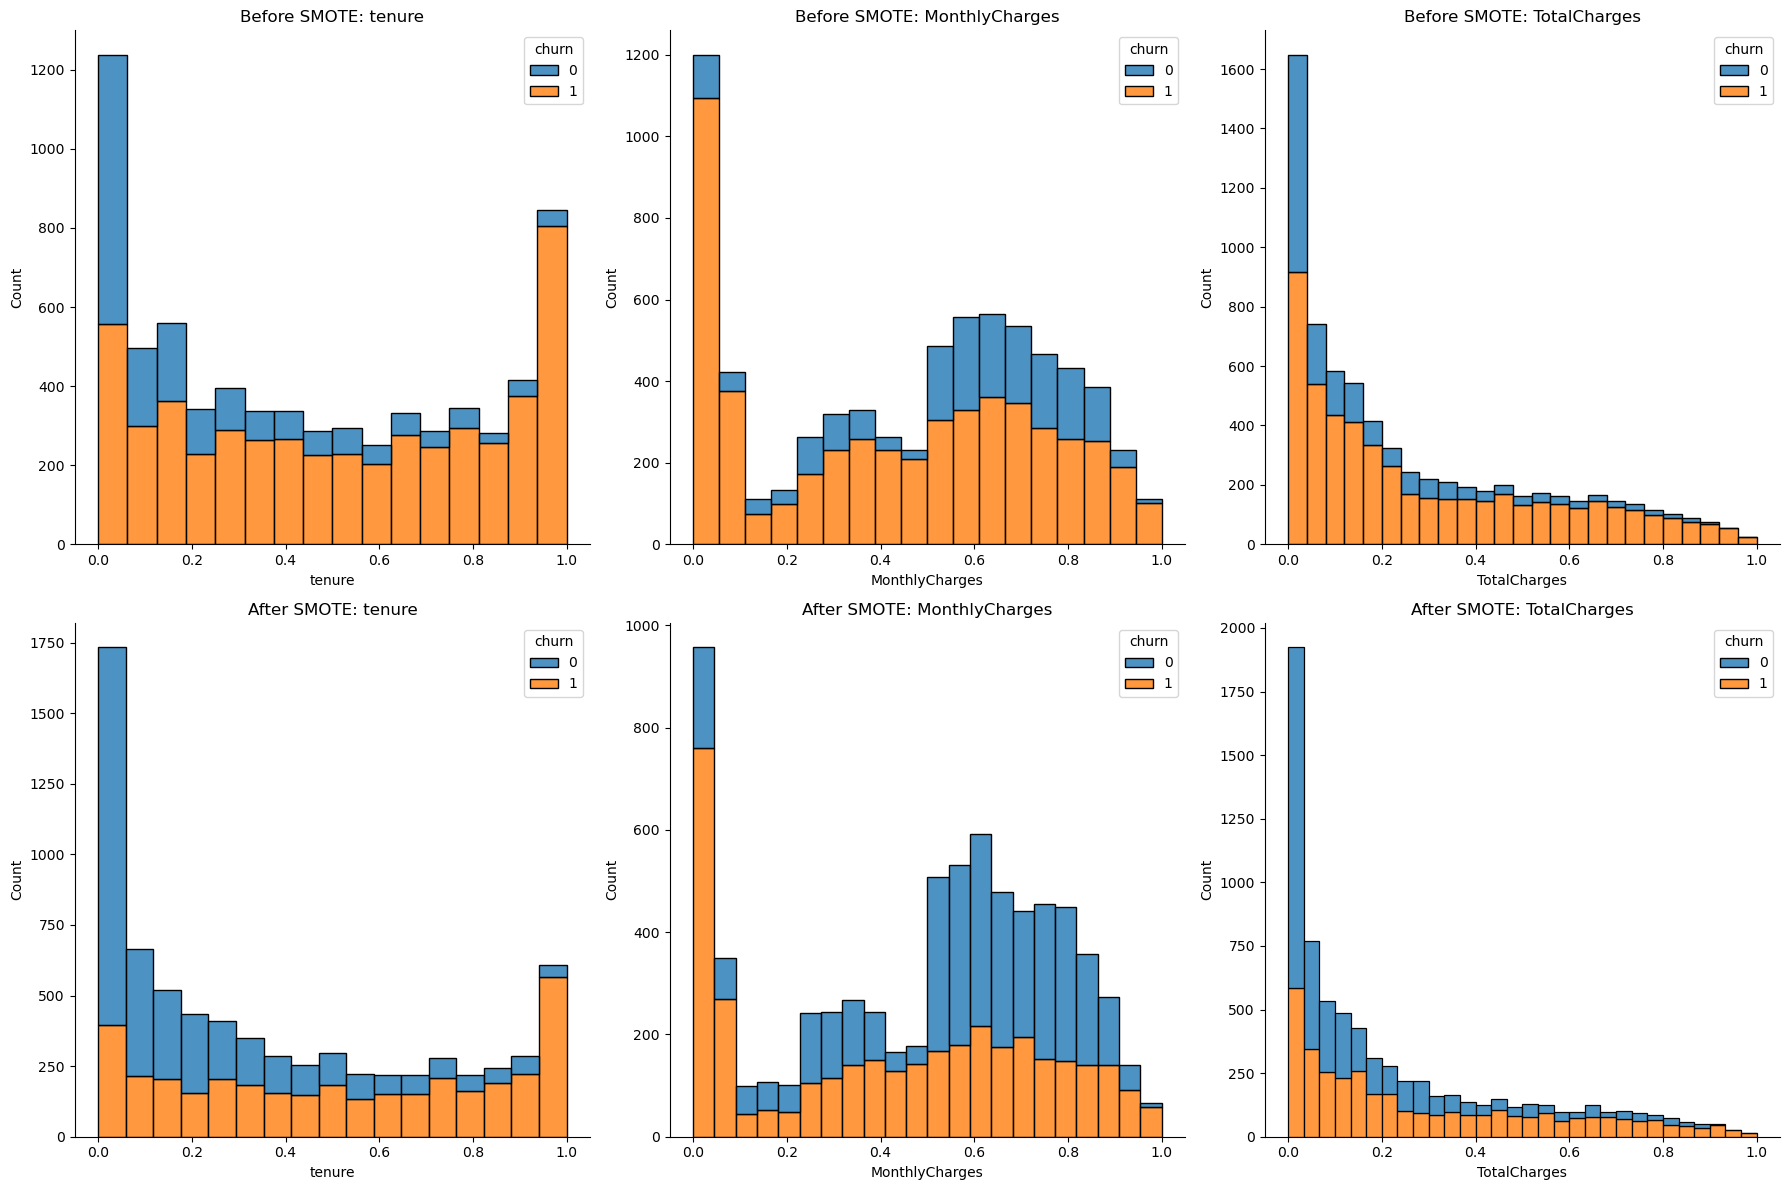

In [271]:
# Numerik sütunları tanımlama
column_numerical = data_scale.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 'churn' sütununun olup olmadığını kontrol edin ve ekleyin
if 'churn' not in data_scale.columns:
    churn_train = pd.Series(y_train_encode, index=X_train_encoded_df.index, name='churn')
    churn_test = pd.Series(y_test_encode, index=X_test_encoded_df.index, name='churn')
    churn_combined = pd.concat([churn_train, churn_test])
    data_scale['churn'] = churn_combined
    print("Added 'churn' column to data_scale.")
# Plotting the histograms
num_plots = min(len(column_numerical), 6)  # to handle cases where there are less than 6 numerical columns
fig, ax = plt.subplots(2, num_plots//2, figsize=(18, 12))
axes_list = [ax_item for ax_row in ax for ax_item in ax_row]

# Define custom palette
custom_palette = {"retain": "#98fb98", "churn": "#ff69b4"}

# SMOTE öncesi histogramlar
for i, col in enumerate(column_numerical[:num_plots//2]):
    sns.histplot(data=data_scale, x=col, hue='churn', multiple='stack', ax=axes_list[i], alpha=0.8)
    axes_list[i].set_title(f'Before SMOTE: {col}')

# SMOTE sonrası histogramlar
for i, col in enumerate(column_numerical[:num_plots//2]):
    sns.histplot(data=data_smote, x=col, hue='churn', multiple='stack', ax=axes_list[i+num_plots//2], alpha=0.8)
    axes_list[i+num_plots//2].set_title(f'After SMOTE: {col}')

plt.tight_layout()
sns.despine()
plt.show()

In [273]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [276]:
# Gerekli kütüphanelerin import edilmesi
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

# Performans değerlendirme fonksiyonu
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
    model_name = []
    accuracy = []
    precision = []
    recall = []
    f1 = []
    roc_auc = []

    for name, y_pred in y_pred_list.items():
        model_name.append(name)
        if average is not None:
            accuracy.append(accuracy_score(y_test, y_pred))
            precision.append(precision_score(y_test, y_pred, average=average))
            recall.append(recall_score(y_test, y_pred, average=average))
            f1.append(f1_score(y_test, y_pred, average=average))
            roc_auc.append(roc_auc_score(y_test, y_pred))
        else:
            accuracy.append(accuracy_score(y_test, y_pred))
            precision.append(precision_score(y_test, y_pred))
            recall.append(recall_score(y_test, y_pred))
            f1.append(f1_score(y_test, y_pred))
            roc_auc.append(roc_auc_score(y_test, y_pred))

    score_list = {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

    score_df = pd.DataFrame(score_list).set_index('model')

    if plot:
        display(score_df.style.background_gradient(axis=axis, cmap=cmap))

    return score_df

# Model listesi
model_list = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=1),
    'Ridge Classifier': RidgeClassifier(random_state=1),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=1),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=1),
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=1),
    'CatBoost Classifier': CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=1),
    'XGBoost': XGBClassifier(random_state=1, eval_metric='logloss', use_label_encoder=False),
    'LightGBM': LGBMClassifier(random_state=1),
}

# Eğitim ve test veri setleri
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_encoded.copy()
y_test_model = y_test_encode.copy()

# Modelleri eğitme ve sonuçları alma
y_pred_list = dict()

for name, model in model_list.items():
    model.fit(X_train_model, y_train_model)
    y_pred_list[name] = model.predict(X_test_model)

# Sonuçları yazdırma
score_smote = get_score(y_pred_list, y_test_model, average='macro')
print(score_smote)

C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:58:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.755324,0.714647,0.762303,0.722778,0.762303
Ridge Classifier,0.752958,0.713740,0.762400,0.721215,0.762400
KNN,0.695693,0.656496,0.693255,0.658419,0.693255
SVC,0.768575,0.715571,0.747991,0.725869,0.747991
Neural Network,0.755797,0.682908,0.668724,0.674704,0.668724
Decision Tree,0.722196,0.653879,0.666907,0.658938,0.666907
Random Forest,0.765263,0.700293,0.704760,0.702422,0.704760
Gradient Boosting Classifier,0.788926,0.732691,0.752169,0.740732,0.752169
AdaBoost Classifier,0.771888,0.722483,0.761059,0.733383,0.761059


                              accuracy  precision    recall  f1_score  \
model                                                                   
Logistic Regression           0.755324   0.714647  0.762303  0.722778   
Ridge Classifier              0.752958   0.713740  0.762400  0.721215   
KNN                           0.695693   0.656496  0.693255  0.658419   
SVC                           0.768575   0.715571  0.747991  0.725869   
Neural Network                0.755797   0.682908  0.668724  0.674704   
Decision Tree                 0.722196   0.653879  0.666907  0.658938   
Random Forest                 0.765263   0.700293  0.704760  0.702422   
Gradient Boosting Classifier  0.788926   0.732691  0.752169  0.740732   
AdaBoost Classifier           0.771888   0.722483  0.761059  0.733383   
CatBoost Classifier           0.780407   0.718147  0.715639  0.716865   
Hist Gradient Boosting        0.787506   0.727833  0.730146  0.728967   
XGBoost                       0.774255   0.710377  

In [278]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

In [279]:

# Performans değerlendirme fonksiyonu
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    scores = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Train Precision': precision_score(y_train, y_pred_train),
        'Test Precision': precision_score(y_test, y_pred_test),
        'Train Recall': recall_score(y_train, y_pred_train),
        'Test Recall': recall_score(y_test, y_pred_test),
        'Train F1 Score': f1_score(y_train, y_pred_train),
        'Test F1 Score': f1_score(y_test, y_pred_test),
        'Train ROC AUC': roc_auc_score(y_train, y_pred_train),
        'Test ROC AUC': roc_auc_score(y_test, y_pred_test)
    }
    return scores

# Modelleri tanımlama
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=1),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=1),
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    'AdaBoost': AdaBoostClassifier(random_state=1),
    'XGBoost': XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=1),
}

# Eğitim ve test veri setleri
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_encoded.copy()
y_test_model = y_test_encode.copy()

# Sonuçları tutmak için bir dictionary oluşturma
results = {}

# Her bir modeli eğitme ve değerlendirme
for name, model in models.items():
    print(f"Evaluating {name}...")
    scores = evaluate_model(model, X_train_model, y_train_model, X_test_model, y_test_model)
    results[name] = scores

# Sonuçları bir DataFrame olarak gösterme
results_df = pd.DataFrame(results).T
results_df = results_df[['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1 Score', 'Test F1 Score', 'Train ROC AUC', 'Test ROC AUC']]
results_df.style.background_gradient(cmap='Blues', axis=1)

# Sonuçları görüntüleme
results_df


Evaluating Logistic Regression...
Evaluating KNN...
Evaluating SVC...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating XGBoost...


C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:01:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC AUC,Test ROC AUC
Logistic Regression,0.785202,0.755324,0.808542,0.902724,0.747377,0.747423,0.776758,0.817765,0.785202,0.762303
KNN,0.866096,0.695693,0.944668,0.861001,0.777747,0.698454,0.853119,0.771256,0.866096,0.693255
SVC,0.852430,0.768575,0.877105,0.881004,0.819713,0.791881,0.847438,0.834069,0.852430,0.747991
Decision Tree,0.998343,0.722196,0.999447,0.828008,0.997239,0.784794,0.998342,0.805822,0.998343,0.666907
Random Forest,0.998343,0.765263,0.999170,0.844648,0.997515,0.833763,0.998342,0.839170,0.998343,0.704760
Gradient Boosting,0.861126,0.788926,0.873288,0.875679,0.844837,0.830541,0.858827,0.852513,0.861126,0.752169
AdaBoost,0.823992,0.771888,0.851032,0.892229,0.785478,0.784149,0.816942,0.834705,0.823992,0.761059
XGBoost,0.954445,0.774255,0.955956,0.845215,0.952789,0.847938,0.954369,0.846574,0.954445,0.709174
LightGBM,0.917587,0.784193,0.917933,0.851733,0.917173,0.855026,0.917553,0.853376,0.917587,0.721631


In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Performans değerlendirme fonksiyonu
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    scores = {
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Train Precision': precision_score(y_train, y_pred_train),
        'Test Precision': precision_score(y_test, y_pred_test),
        'Train Recall': recall_score(y_train, y_pred_train),
        'Test Recall': recall_score(y_test, y_pred_test),
        'Train F1 Score': f1_score(y_train, y_pred_train),
        'Test F1 Score': f1_score(y_test, y_pred_test),
        'Train ROC AUC': roc_auc_score(y_train, y_pred_train),
        'Test ROC AUC': roc_auc_score(y_test, y_pred_test)
    }
    return scores

# Modelleri tanımlama
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=1),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=1),
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    'AdaBoost': AdaBoostClassifier(random_state=1),
    'XGBoost': XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=1),
}

# Eğitim ve test veri setleri
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_encoded.copy()
y_test_model = y_test_encode.copy()

# Sonuçları tutmak için bir dictionary oluşturma
results = {}

# Her bir modeli eğitme ve değerlendirme
for name, model in models.items():
    print(f"Evaluating {name}...")
    scores = evaluate_model(model, X_train_model, y_train_model, X_test_model, y_test_model)
    results[name] = scores

# Sonuçları bir DataFrame olarak gösterme
results_df = pd.DataFrame(results).T
results_df = results_df[['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1 Score', 'Test F1 Score', 'Train ROC AUC', 'Test ROC AUC']]

# Sonuçları renklendirilmiş şekilde görüntüleme
display(results_df.style.background_gradient(cmap='Blues', axis=1))


Evaluating Logistic Regression...
Evaluating KNN...
Evaluating SVC...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating XGBoost...


C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:02:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC AUC,Test ROC AUC
Logistic Regression,0.785202,0.755324,0.808542,0.902724,0.747377,0.747423,0.776758,0.817765,0.785202,0.762303
KNN,0.866096,0.695693,0.944668,0.861001,0.777747,0.698454,0.853119,0.771256,0.866096,0.693255
SVC,0.852430,0.768575,0.877105,0.881004,0.819713,0.791881,0.847438,0.834069,0.852430,0.747991
Decision Tree,0.998343,0.722196,0.999447,0.828008,0.997239,0.784794,0.998342,0.805822,0.998343,0.666907
Random Forest,0.998343,0.765263,0.999170,0.844648,0.997515,0.833763,0.998342,0.839170,0.998343,0.704760
Gradient Boosting,0.861126,0.788926,0.873288,0.875679,0.844837,0.830541,0.858827,0.852513,0.861126,0.752169
AdaBoost,0.823992,0.771888,0.851032,0.892229,0.785478,0.784149,0.816942,0.834705,0.823992,0.761059
XGBoost,0.954445,0.774255,0.955956,0.845215,0.952789,0.847938,0.954369,0.846574,0.954445,0.709174
LightGBM,0.917587,0.784193,0.917933,0.851733,0.917173,0.855026,0.917553,0.853376,0.917587,0.721631


In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Performans değerlendirme fonksiyonu
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
    model_name = []
    accuracy = []
    precision = []
    recall = []
    f1 = []
    roc_auc = []

    for name, y_pred in y_pred_list.items():
        model_name.append(name)
        if average is not None:
            accuracy.append(accuracy_score(y_test, y_pred))
            precision.append(precision_score(y_test, y_pred, average=average))
            recall.append(recall_score(y_test, y_pred, average=average))
            f1.append(f1_score(y_test, y_pred, average=average))
            roc_auc.append(roc_auc_score(y_test, y_pred, average=average))
        else:
            accuracy.append(accuracy_score(y_test, y_pred))
            precision.append(precision_score(y_test, y_pred))
            recall.append(recall_score(y_test, y_pred))
            f1.append(f1_score(y_test, y_pred))
            roc_auc.append(roc_auc_score(y_test, y_pred))

    score_list = {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

    score_df = pd.DataFrame(score_list).set_index('model')

    if plot:
        display(score_df.style.background_gradient(axis=axis, cmap=cmap))

    return score_df

# Model listesi
model_list = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=1),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=1),
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    'AdaBoost': AdaBoostClassifier(random_state=1),
    'XGBoost': XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=1),
}

# Eğitim ve test veri setleri
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_encoded.copy()
y_test_model = y_test_encode.copy()

# Modelleri eğitme ve sonuçları alma
y_pred_list = dict()

for name, model in model_list.items():
    model.fit(X_train_model, y_train_model)
    y_pred_list[name] = model.predict(X_test_model)

# Sonuçları yazdırma
score_smote = get_score(y_pred_list, y_test_model, average='macro')


C:\Users\ozkannil\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:05:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2238
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Logistic Regression,0.755324,0.714647,0.762303,0.722778,0.762303
KNN,0.695693,0.656496,0.693255,0.658419,0.693255
SVC,0.768575,0.715571,0.747991,0.725869,0.747991
Decision Tree,0.722196,0.653879,0.666907,0.658938,0.666907
Random Forest,0.765263,0.700293,0.704760,0.702422,0.704760
Gradient Boosting,0.788926,0.732691,0.752169,0.740732,0.752169
AdaBoost,0.771888,0.722483,0.761059,0.733383,0.761059
XGBoost,0.774255,0.710377,0.709174,0.709769,0.709174
LightGBM,0.784193,0.723164,0.721631,0.722387,0.721631
